# DAI-101 Assignment

## 1. Data cleaning

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [2]:
df=pd.read_csv('laptopData.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### Inspecting the structure of the dataset

In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [6]:
df.shape

(1303, 12)

We can see that the column named 'Unnamed: 0' is irrelevant as it just tells the serial number so we can remove it for our EDA.

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Handling null values:

In [8]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

Since there are just 30 rows having null values which is a small number in front of the total number of the rows 1303 so we can just remove them

In [9]:
df.dropna(inplace=True,how='any')

In [10]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
df.shape

(1273, 11)

As we can see now 30 rows with null values are removed and we have total 1273 rows now.

### Handling duplicate values

In [12]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify removal
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

Number of duplicate rows: 29
Number of duplicate rows after removal: 0


In [13]:
df.shape

(1244, 11)

Now after removing duplicates we have finally 1244 rows remaining

### Fixing the categorical values

In [14]:
df['Inches'].value_counts()

Inches
15.6    621
14      188
17.3    162
13.3    157
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

Removing the row with '?' in Inches and Weight column

In [15]:
df = df[df['Inches'] != '?']
df = df[df['Weight'] != '?']

df['Inches'].value_counts()

Inches
15.6    621
14      188
17.3    162
13.3    156
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

Now inches, RAM, weight columns are in object datatype but we can convert them to numerical form for better EDA.

In [16]:
df['Inches'] = df['Inches'].astype(float)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1242 non-null   object 
 1   TypeName          1242 non-null   object 
 2   Inches            1242 non-null   float64
 3   ScreenResolution  1242 non-null   object 
 4   Cpu               1242 non-null   object 
 5   Ram               1242 non-null   int64  
 6   Memory            1242 non-null   object 
 7   Gpu               1242 non-null   object 
 8   OpSys             1242 non-null   object 
 9   Weight            1242 non-null   float64
 10  Price             1242 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 116.4+ KB


In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [18]:
# Now we have 4 numerical features in this dataset
df.describe()

,Inches,Ram,Weight,Price
count,1242.000000,1242.000000,1242.000000,1242.000000
mean,15.140338,8.528986,2.080475,60538.359281
std,1.967481,5.591338,0.814352,37402.428994
min,10.100000,1.000000,0.000200,9270.720000
25%,14.000000,4.000000,1.500000,32645.055600
50%,15.600000,8.000000,2.040000,52693.920000
75%,15.600000,8.000000,2.330000,79773.480000
max,35.600000,64.000000,11.100000,324954.720000


In [19]:
df['Company'].value_counts()

Company
Lenovo       282
Dell         279
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

### Detecting and treating the outliers

Detecting outliers using z-score values with a threshold value of 3 and removing them finally.

In [20]:
from scipy import stats
numerical_cols = ['Inches', 'Ram', 'Weight', 'Price']

# Calculating Z-scores of numerical columns
z_scores = np.abs(stats.zscore(df[numerical_cols]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df = df[~outliers]
df.shape

(1199, 11)

## 2. EDA

### Univariate Analysis

#### Summary statisticcs

In [21]:
# Mean
mean_values = df[numerical_cols].mean()
print("Mean values:\n", mean_values)

# Median
median_values = df[numerical_cols].median()
print("\nMedian values:\n", median_values)

# Mode
mode_values = df[numerical_cols].mode().iloc[0]
print("\nMode values:\n", mode_values)

# Variance
variance_values = df[numerical_cols].var()
print("\nVariance values:\n", variance_values)

Mean values:
 Inches       14.993328
Ram           8.024187
Weight        2.013920
Price     58106.761846
dtype: float64

Median values:
 Inches       15.60
Ram           8.00
Weight        2.02
Price     52161.12
dtype: float64

Mode values:
 Inches       15.60
Ram           8.00
Weight        2.20
Price     58554.72
Name: 0, dtype: float64

Variance values:
 Inches    1.992510e+00
Ram       1.597354e+01
Weight    3.931521e-01
Price     1.064402e+09
dtype: float64


#### Frequency distributions for the categorial variables

In [22]:
categorical_cols = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

for col in categorical_cols:
    print(f"Frequency distribution for {col}:\n{df[col].value_counts()}\n")

Frequency distribution for Company:
Company
Dell         268
Lenovo       267
HP           258
Asus         143
Acer          99
MSI           52
Toshiba       45
Apple         21
Samsung        9
Mediacom       7
Microsoft      5
Xiaomi         4
Vero           4
Razer          4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

Frequency distribution for TypeName:
TypeName
Notebook              676
Gaming                184
Ultrabook             181
2 in 1 Convertible    111
Workstation            25
Netbook                22
Name: count, dtype: int64

Frequency distribution for ScreenResolution:
ScreenResolution
Full HD 1920x1080                                481
1366x768                                         251
IPS Panel Full HD 1920x1080                      207
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   44
1600x900                                          

#### Plotting histograms and boxplots for numerical data for vizualization

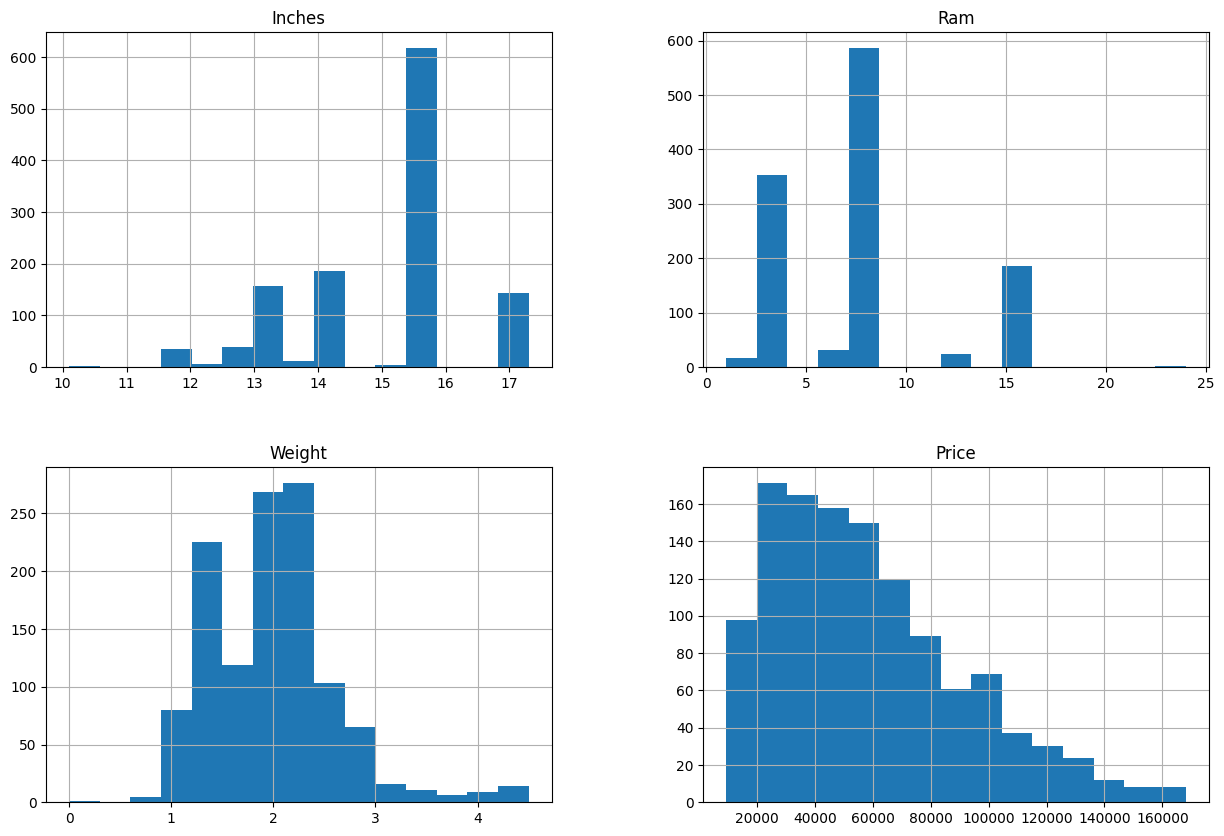

In [23]:
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.show()

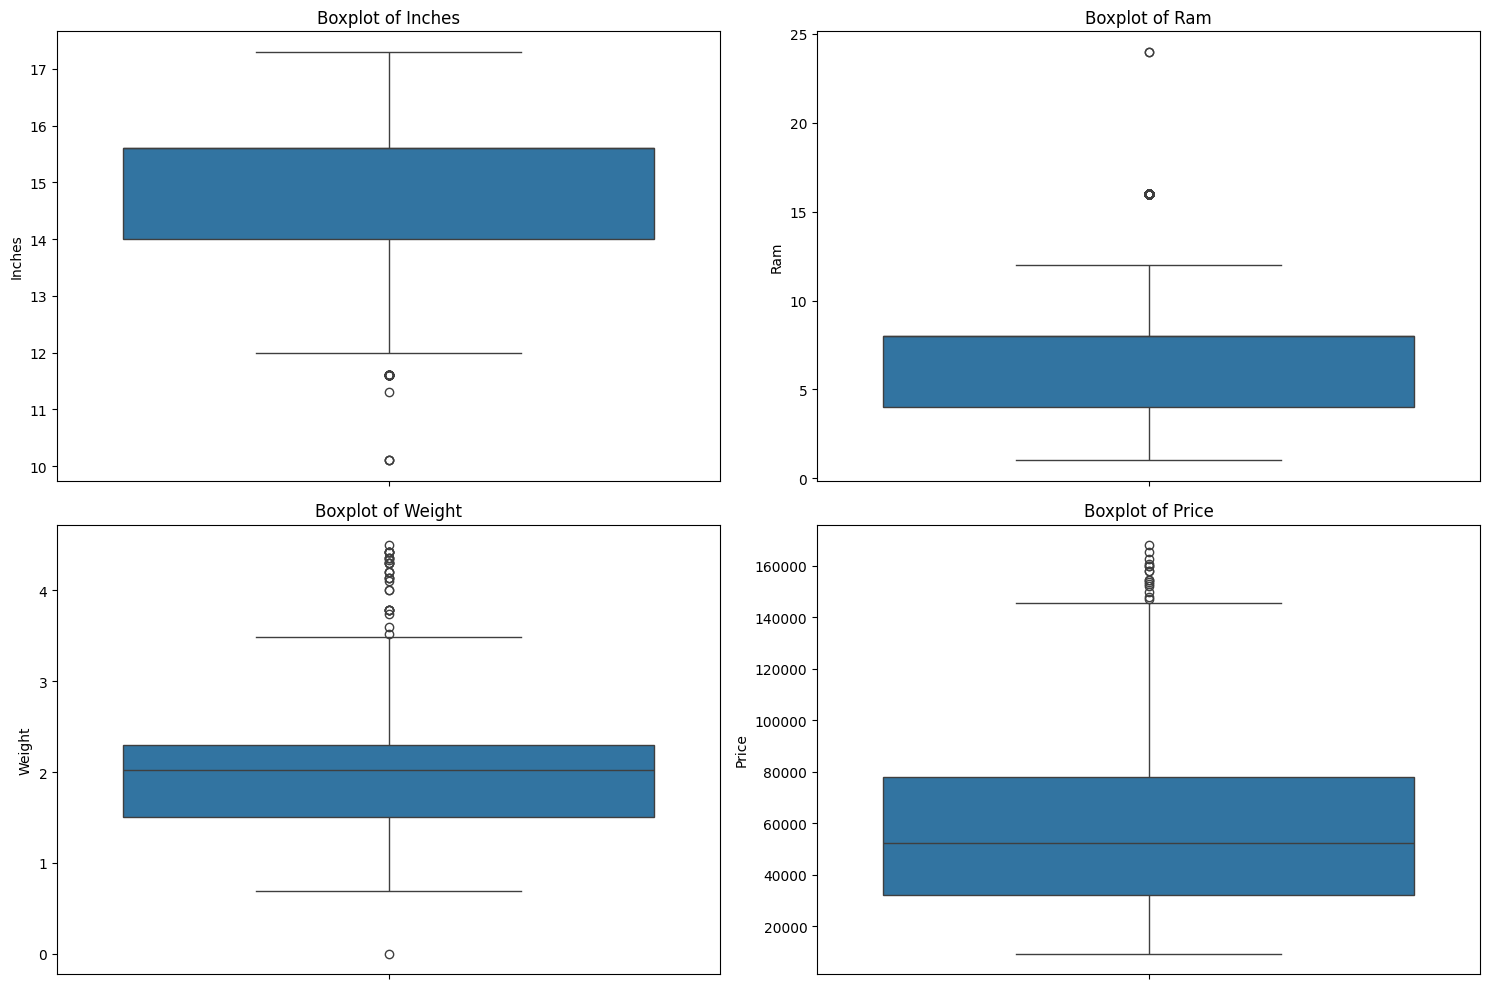

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Even though we removed the outliers using z-score values earlier but there are still outliers, in prices and weights according to boxplot, but we will not remove them as they indicate the expensive and heavy laptops which can be useful for our EDA.

### Bivariate analysis

#### Correlation matrix for numerical columns

In [34]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

print(correlation_matrix)

          Inches       Ram    Weight     Price
Inches  1.000000  0.182714  0.819773 -0.017829
Ram     0.182714  1.000000  0.272288  0.709057
Weight  0.819773  0.272288  1.000000  0.088774
Price  -0.017829  0.709057  0.088774  1.000000


#### Pairwise Scatterplots for numerical variables

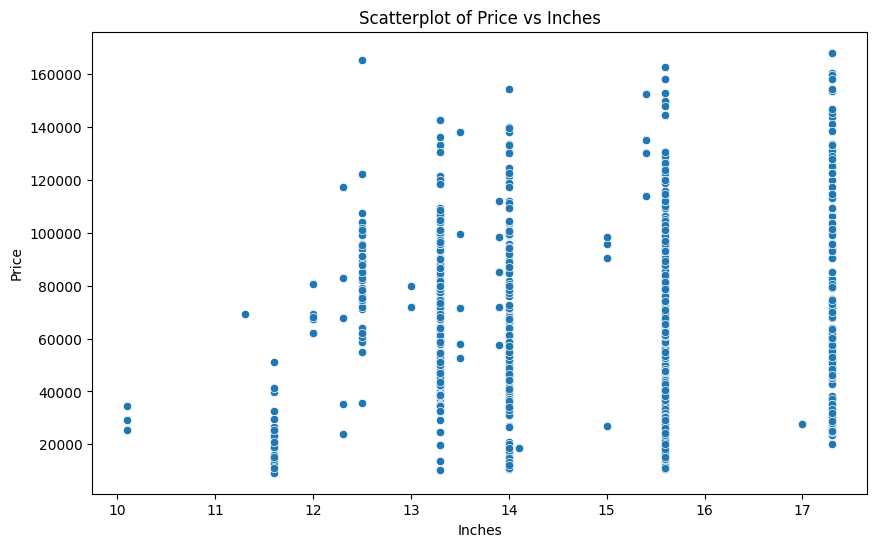

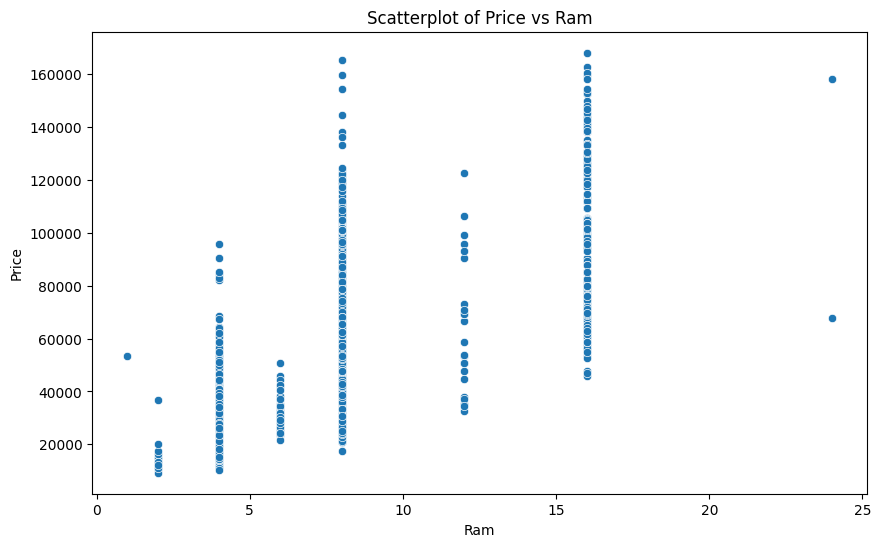

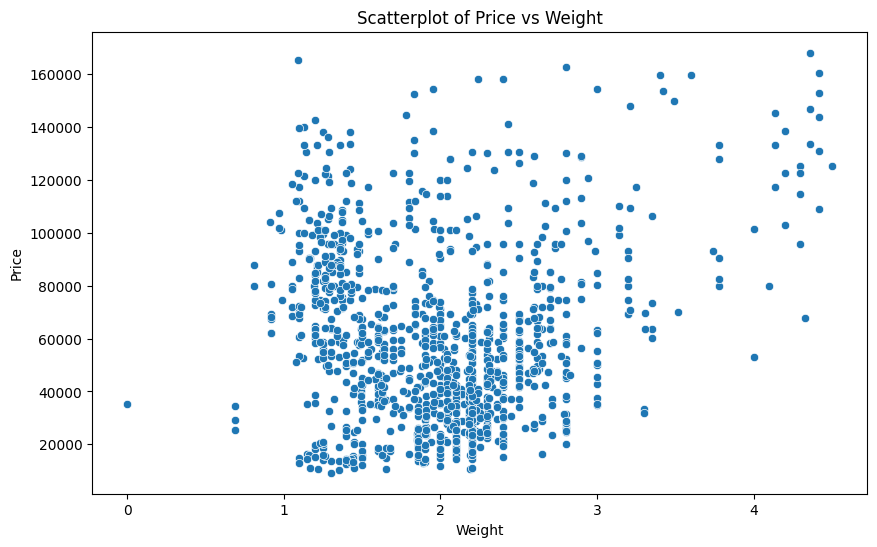

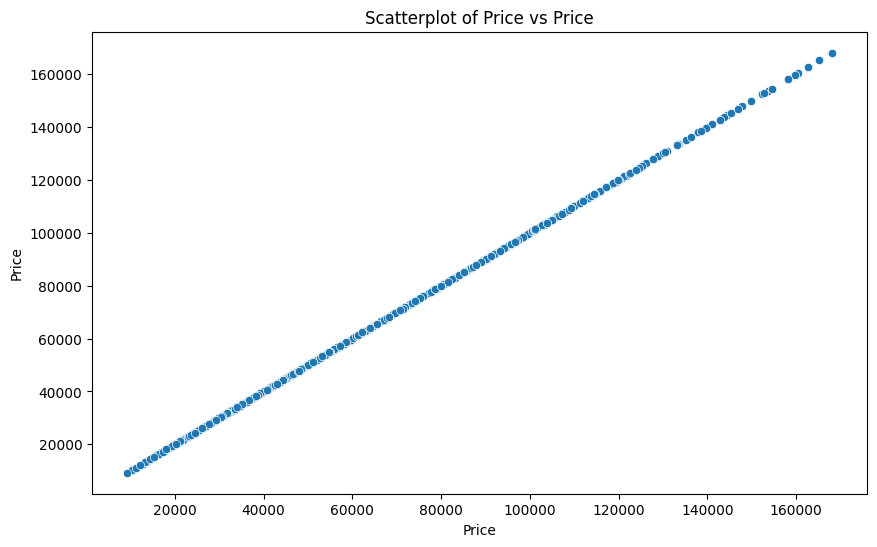

In [33]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title(f'Scatterplot of Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

#### Analyzing categorical variables with numerical ones

We have 4 numerical varaibles and 7 categorical variables. So to analyze the relationship between them we will plot barplots and violinplots with categorical variables on x-axis and numerical ones on y-axis.

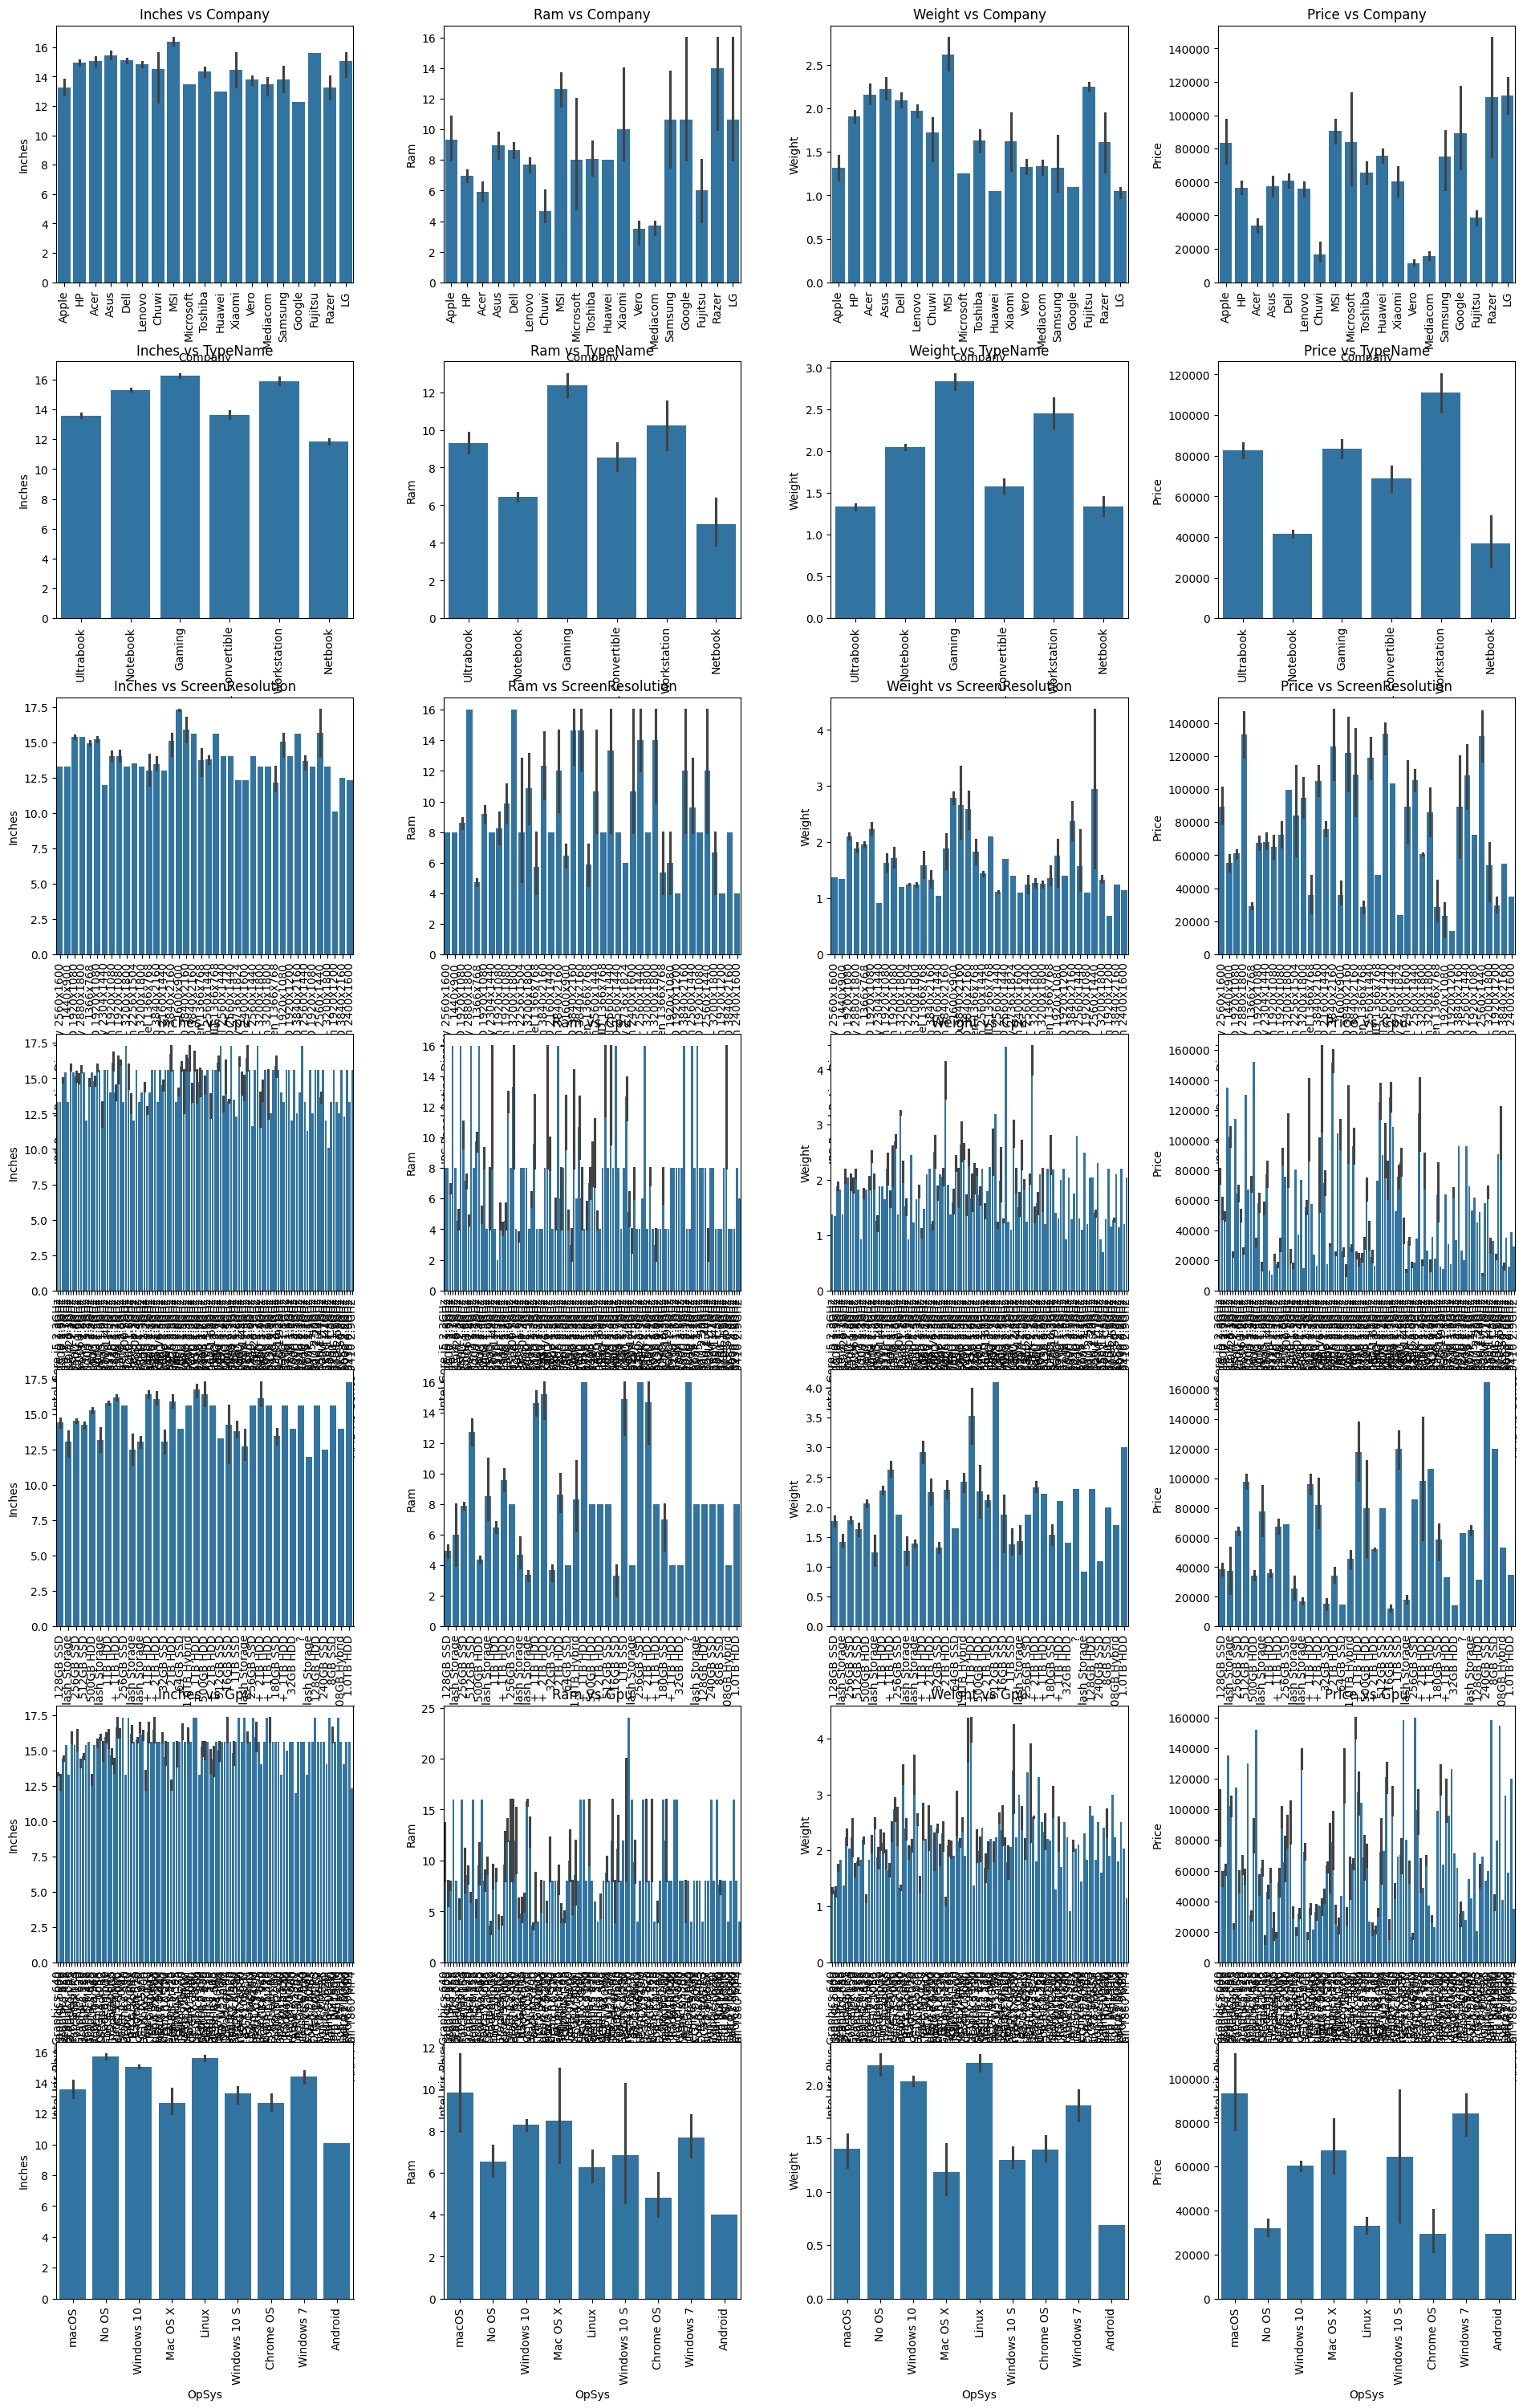

In [27]:
fig, axes = plt.subplots(len(categorical_cols), len(numerical_cols), figsize=(20, 30))
fig.tight_layout(pad=5.0)

for i, cat_col in enumerate(categorical_cols):
    for j, num_col in enumerate(numerical_cols):
        sns.barplot(x=cat_col, y=num_col, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_col} vs {cat_col}')
        axes[i, j].tick_params(axis='x', rotation=90)

plt.show()

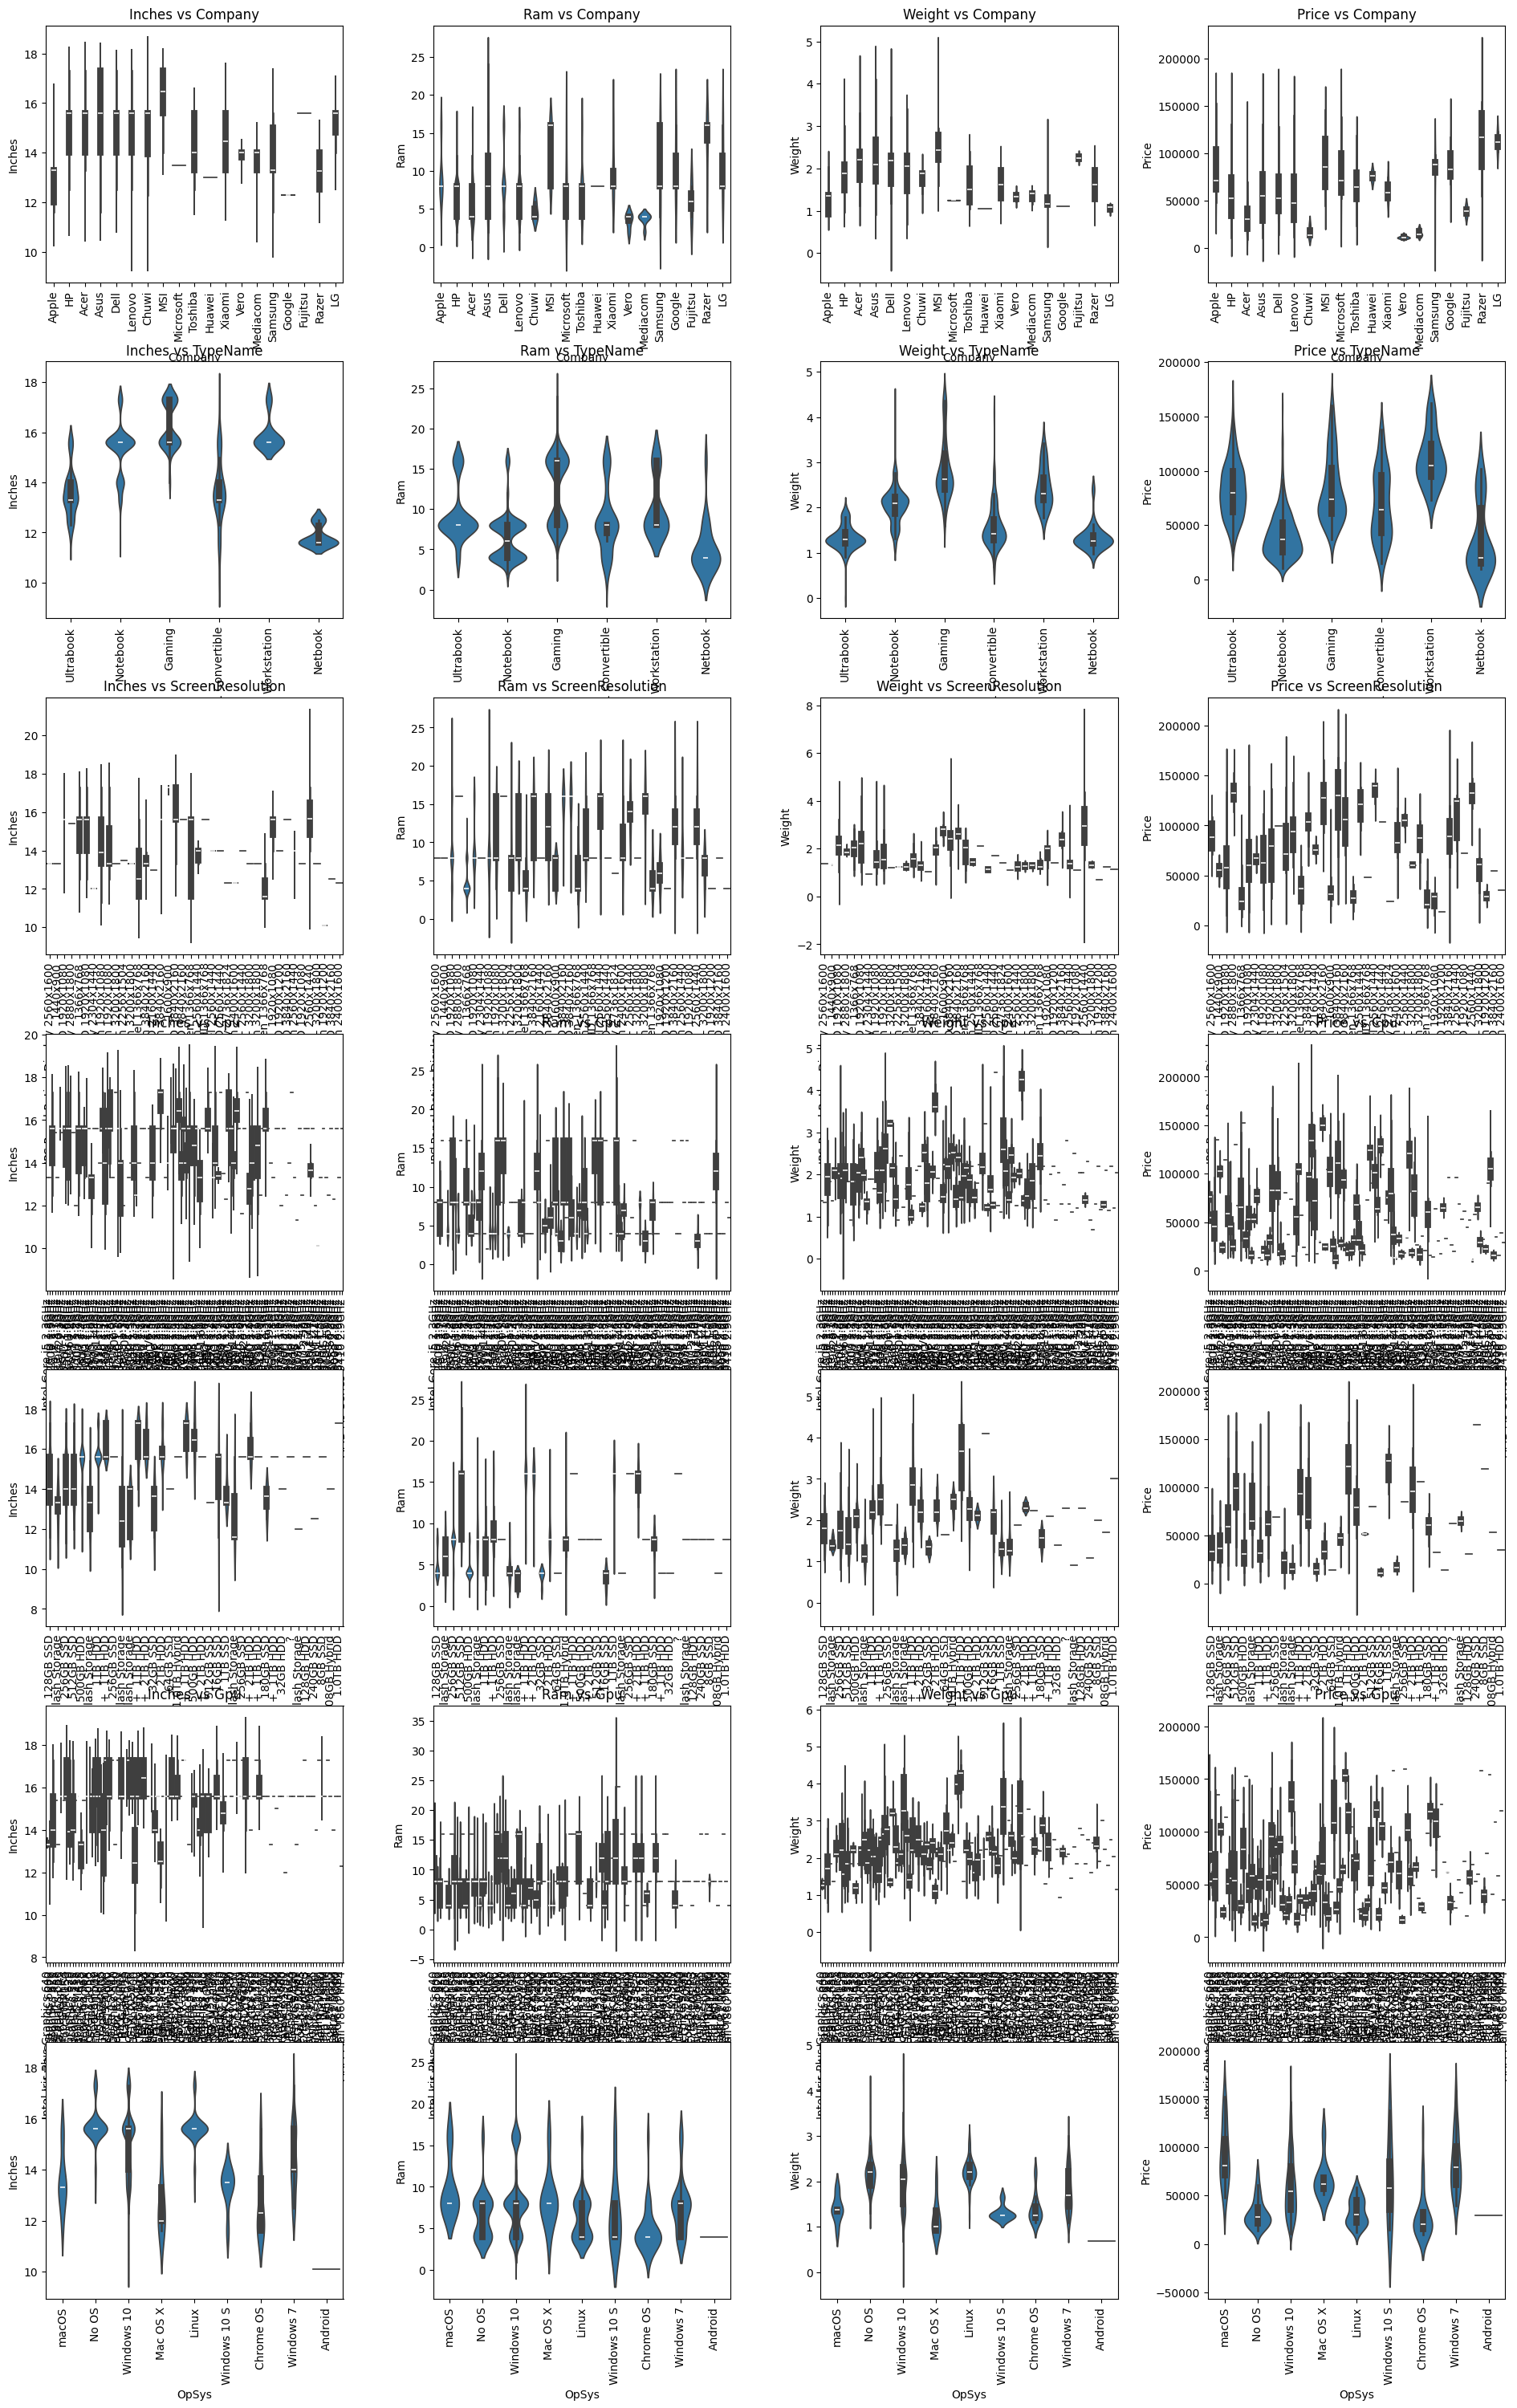

In [28]:
fig, axes = plt.subplots(len(categorical_cols), len(numerical_cols), figsize=(20, 30))
fig.tight_layout(pad=5.0)

for i, cat_col in enumerate(categorical_cols):
    for j, num_col in enumerate(numerical_cols):
        sns.violinplot(x=cat_col, y=num_col, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_col} vs {cat_col}')
        axes[i, j].tick_params(axis='x', rotation=90)

plt.show()

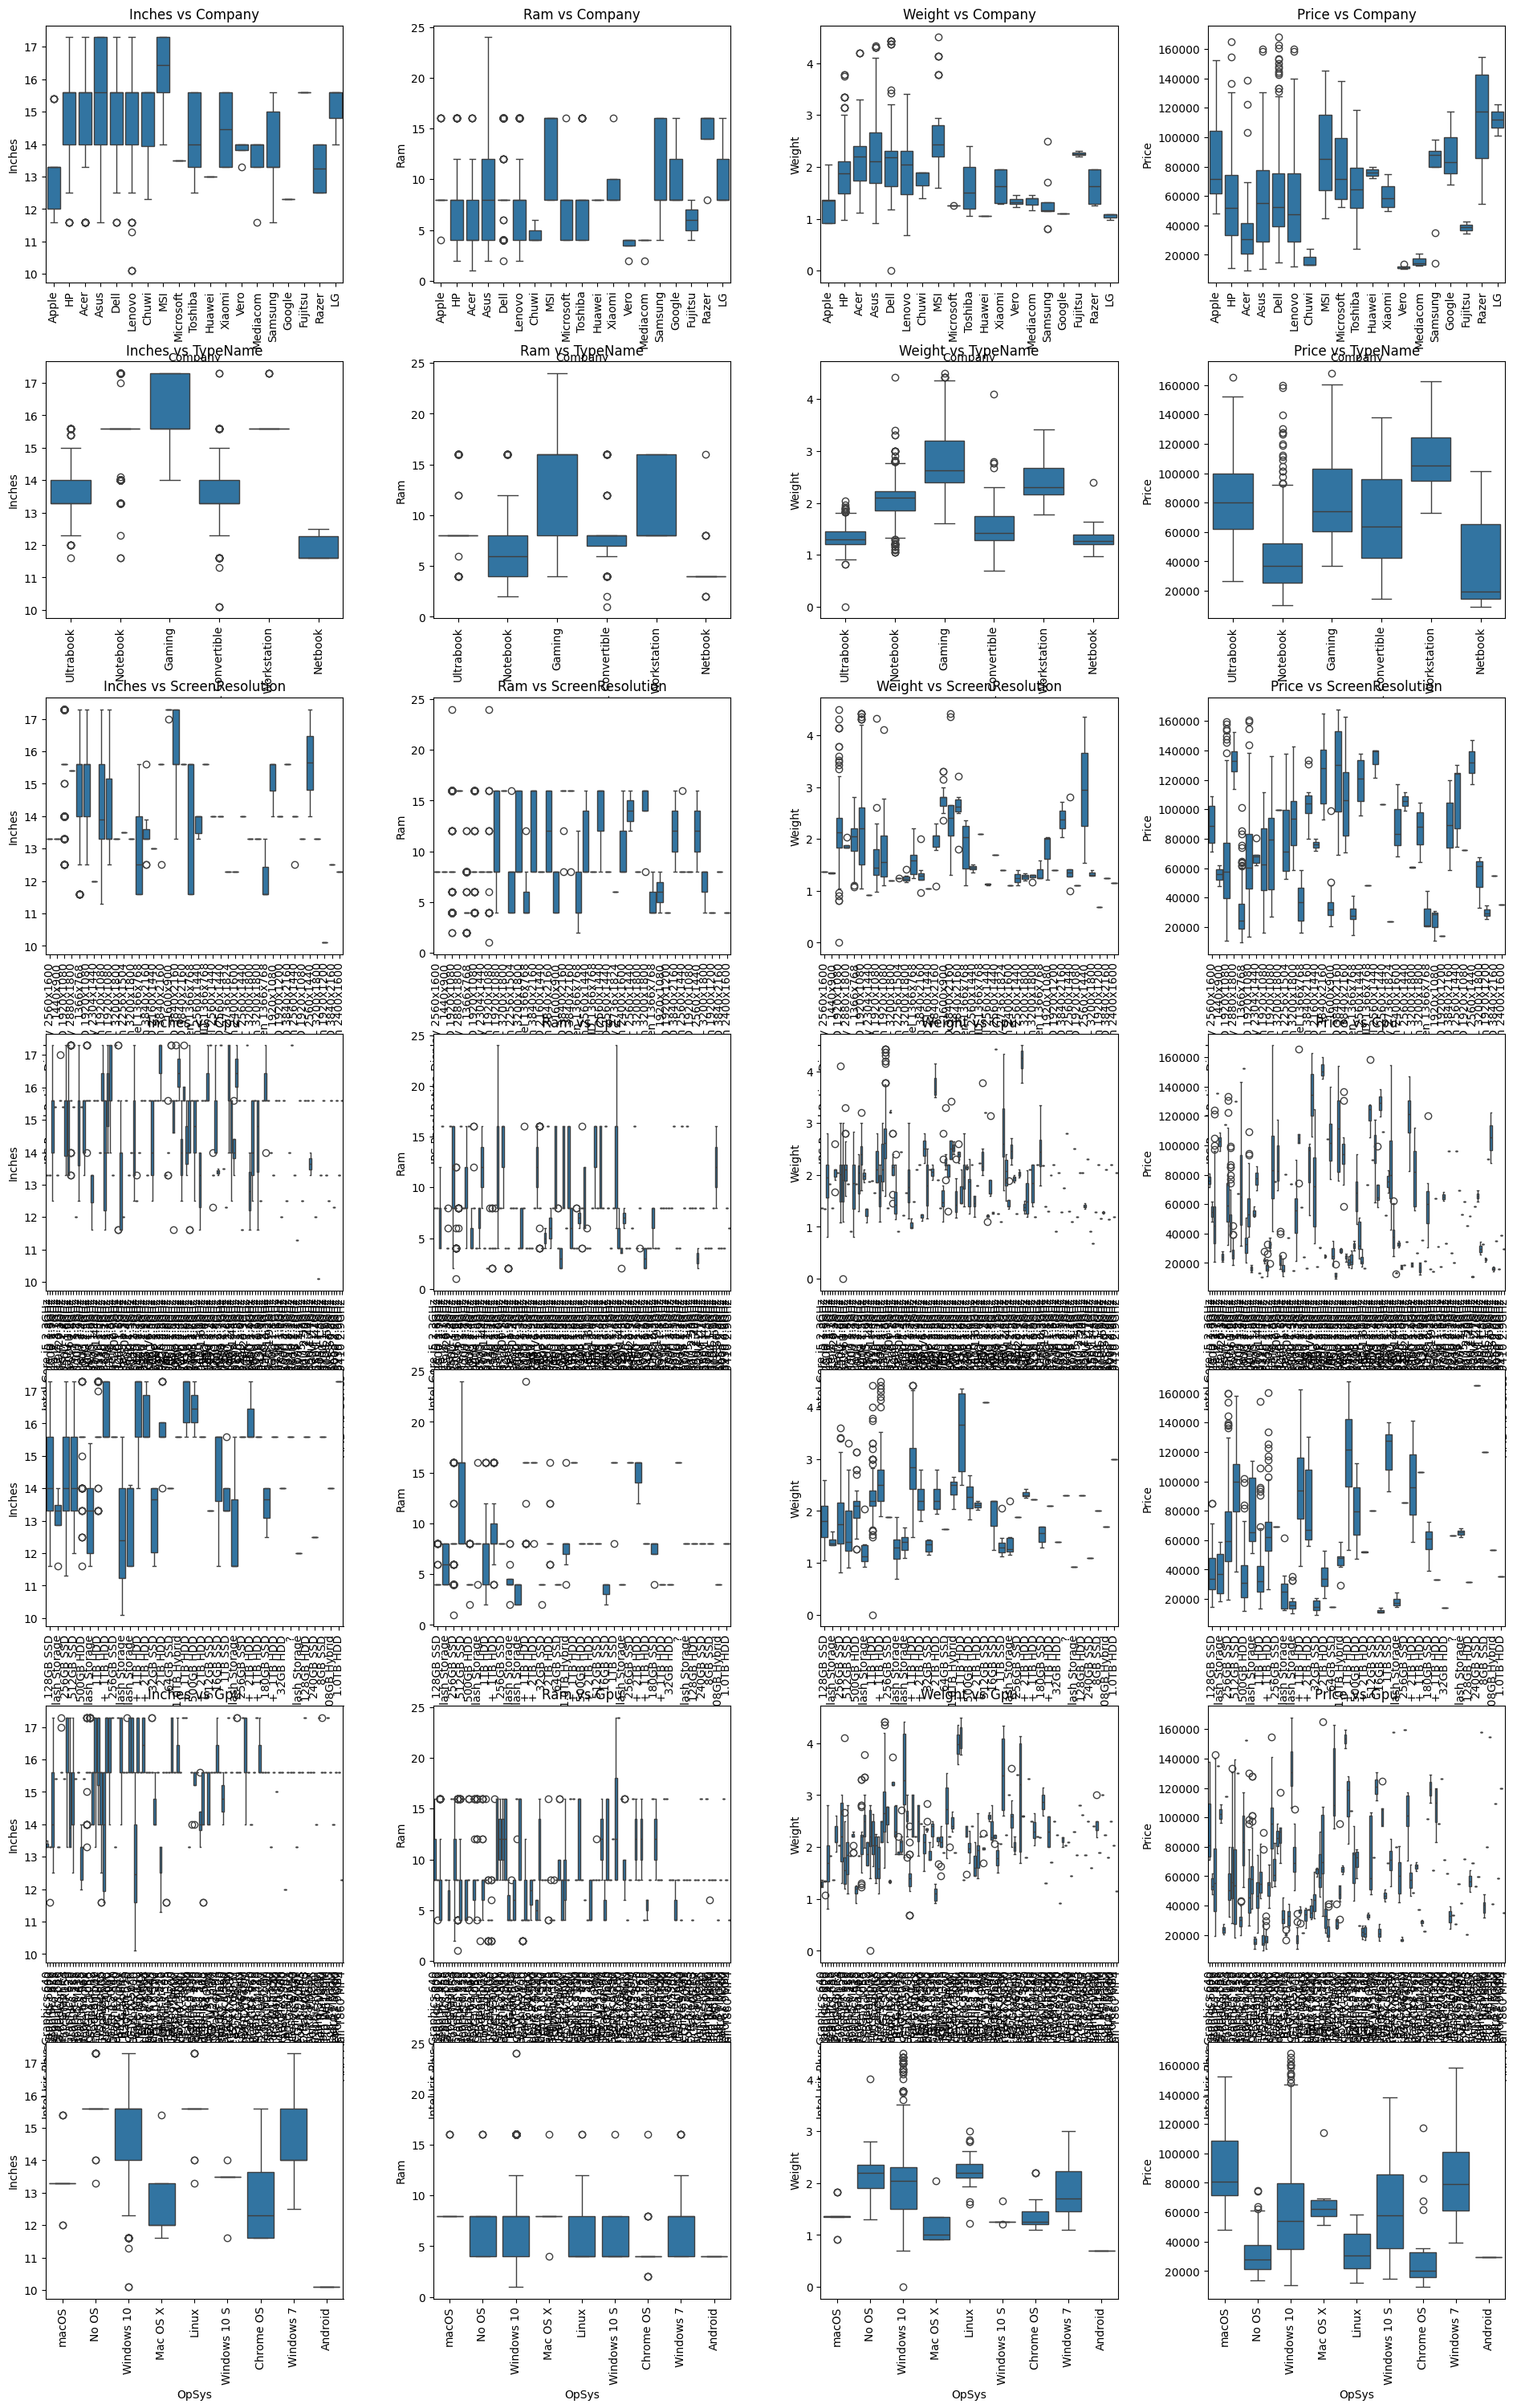

In [29]:
fig, axes = plt.subplots(len(categorical_cols), len(numerical_cols), figsize=(20, 30))
fig.tight_layout(pad=5.0)

for i, cat_col in enumerate(categorical_cols):
    for j, num_col in enumerate(numerical_cols):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_col} vs {cat_col}')
        axes[i, j].tick_params(axis='x', rotation=90)

plt.show()

Since there are too many categories in CPU, GPU, and Memory columns the plots too not give much information but we can extract the relationships between rest of the categorical variables and the numerical varibales through these barplots, violin plots and boxplots.

### Multivariate Analysis

#### Pairplots for numerical features

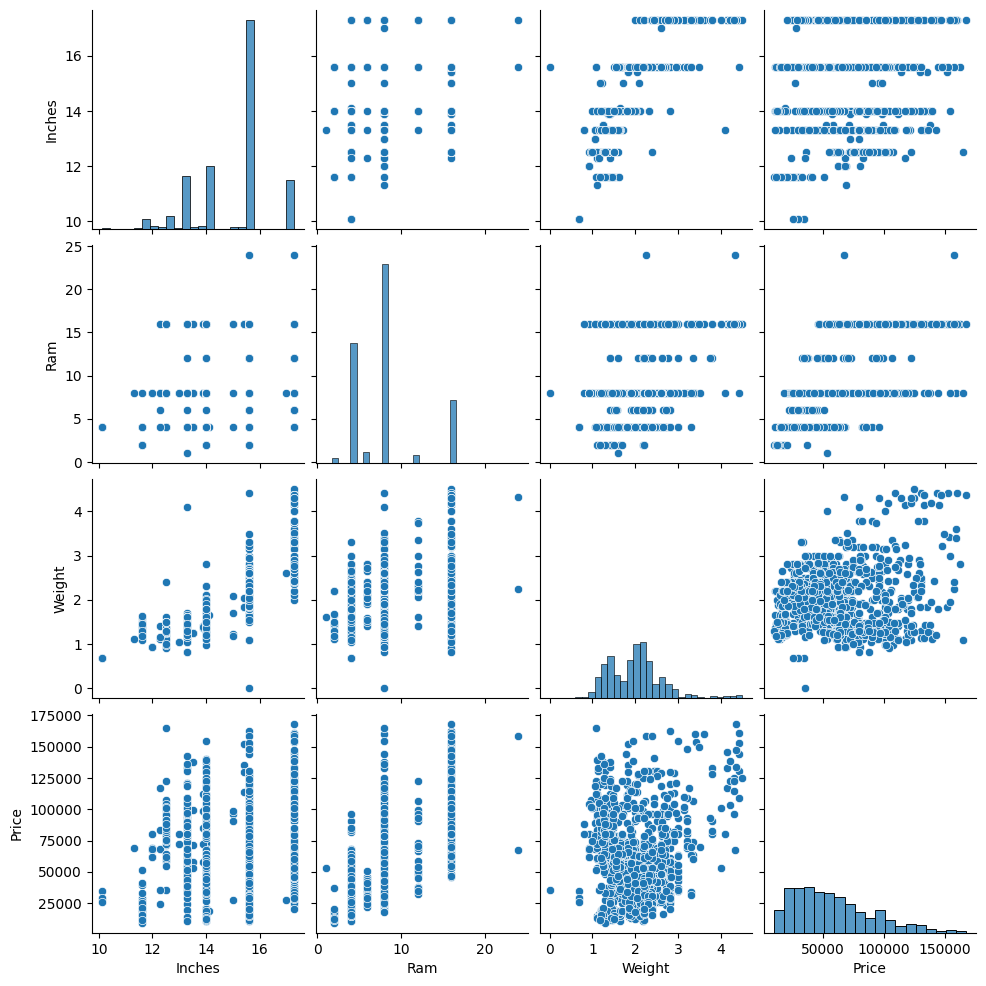

In [30]:
sns.pairplot(df[numerical_cols])
plt.show()

#### Heatmap for vizualizing the correlation matrix

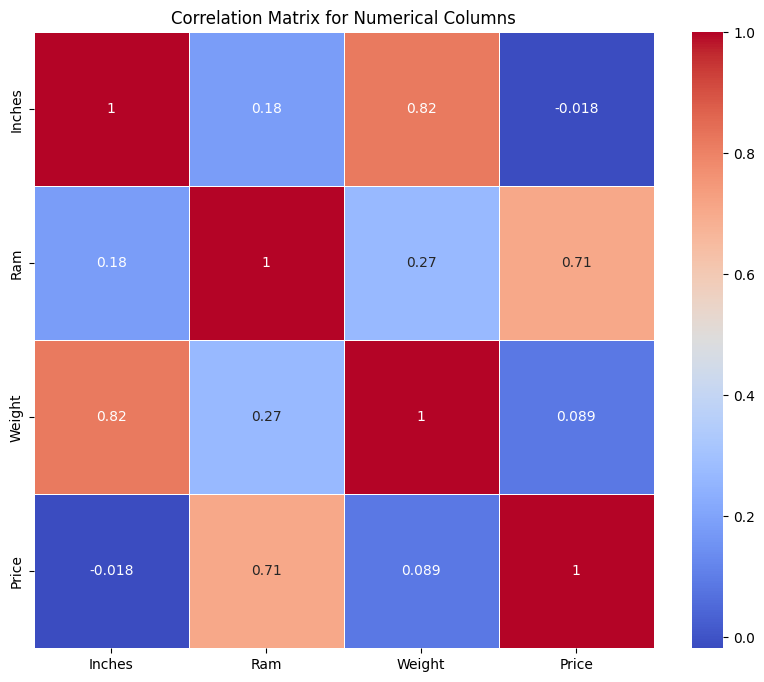

In [ ]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap for Numerical Columns')
plt.show()

#### Grouping the Comapny and TypeName columns to study the relationsip with Pricing

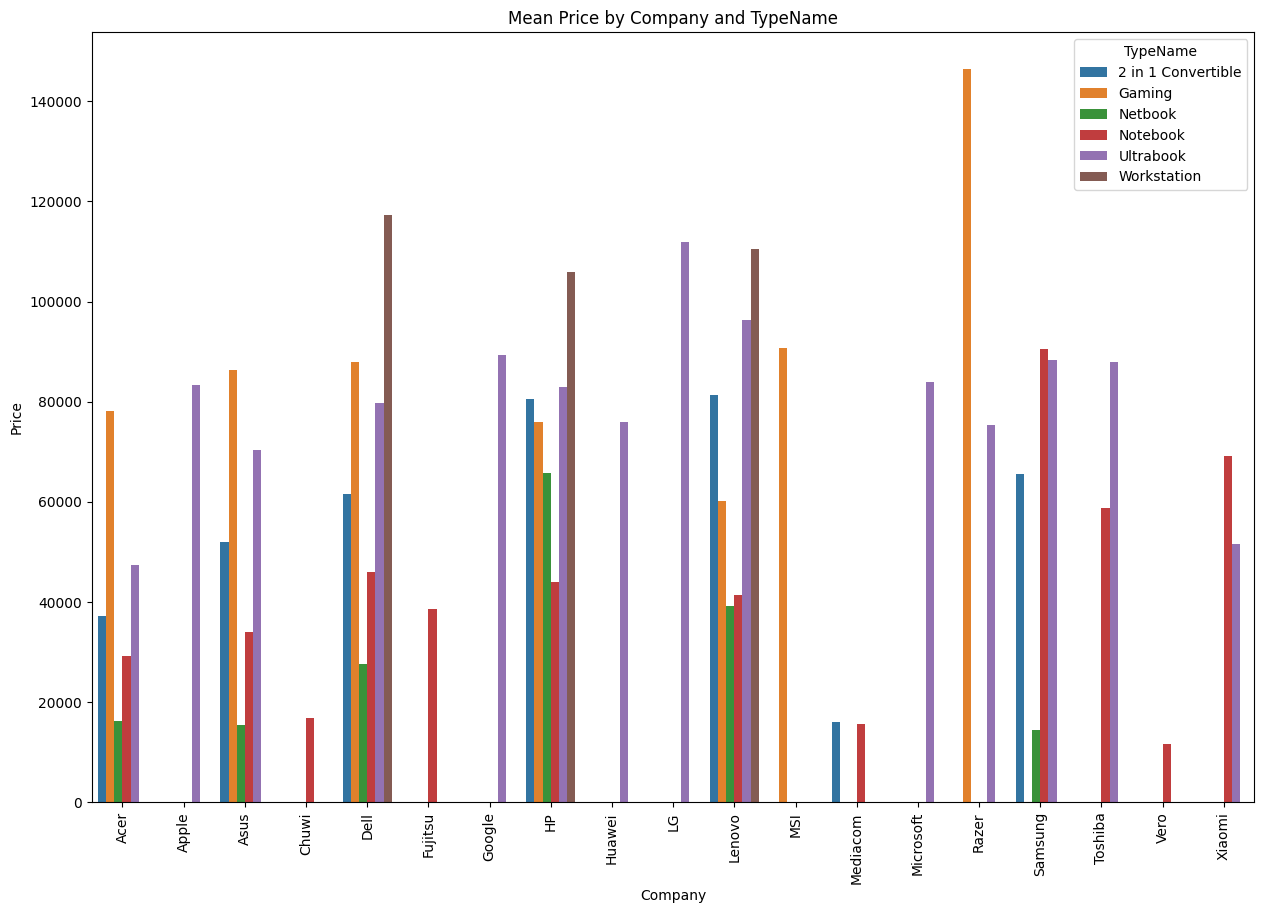

In [42]:
# Group by multiple categorical features and calculate the mean price
grouped_df = df.groupby(['Company', 'TypeName'])['Price'].mean().reset_index()

# Display the grouped dataframe
# Group by multiple categorical features and calculate the mean price
grouped_df = df.groupby(['Company', 'TypeName'])['Price'].mean().reset_index()

# Plot the grouped dataframe
plt.figure(figsize=(15, 10))
sns.barplot(x='Company', y='Price', hue='TypeName', data=grouped_df)
plt.title('Mean Price by Company and TypeName')
plt.xticks(rotation=90)
plt.show()